In [3]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

Let's apply the Sobel operator to our RIT mascot.
We will look at a horizontal and a vertical kernel

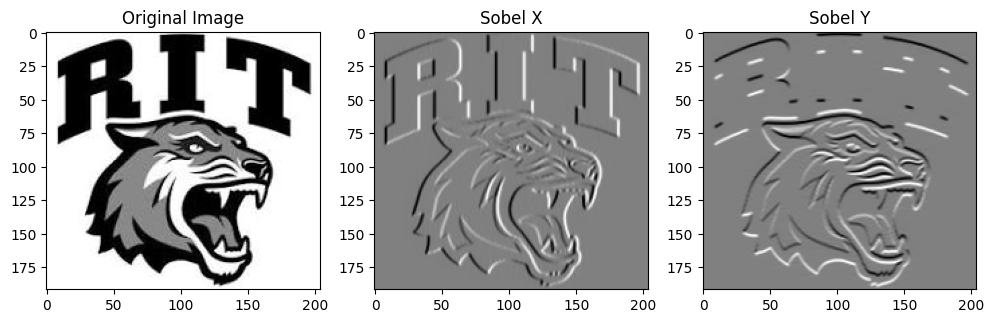

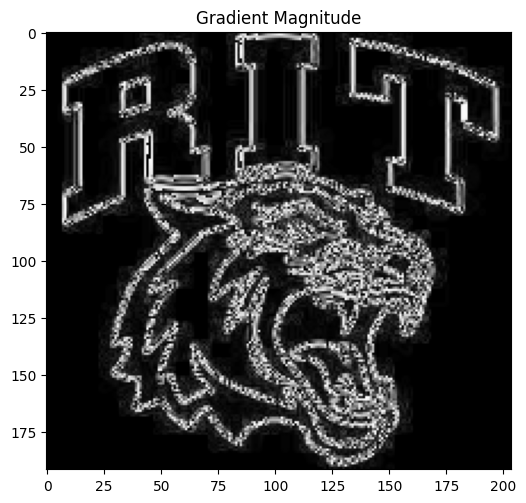

In [4]:
# Load the image
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator in the X direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Apply Sobel operator in the Y direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude)

# Normalize to get values between 0 and 255 for visualization
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Y')
plt.imshow(sobel_y, cmap='gray')

plt.figure(figsize=(6, 6))
plt.title('Gradient Magnitude')
plt.imshow(sobel_magnitude, cmap='gray')

plt.show()

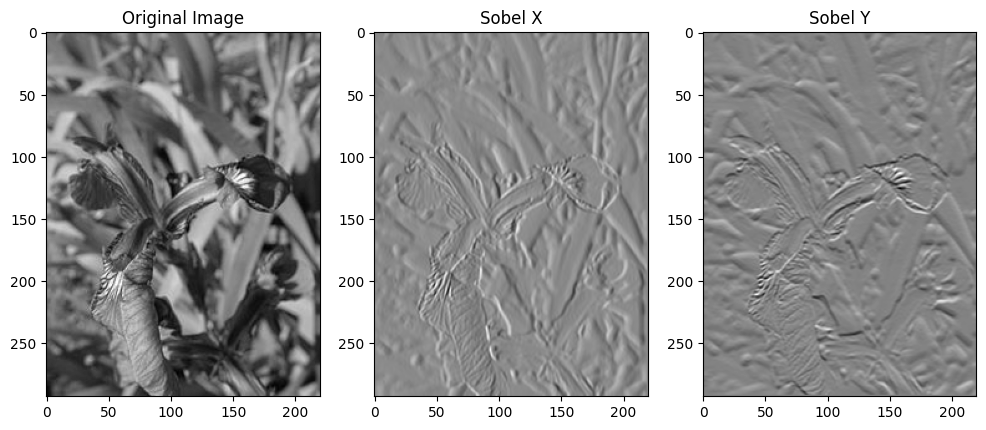

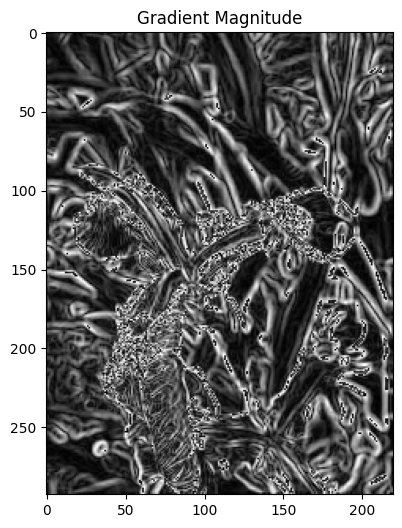

In [5]:
# Load the image
image = cv2.imread('iris_1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator in the X direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Apply Sobel operator in the Y direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude)

# Normalize to get values between 0 and 255 for visualization
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Y')
plt.imshow(sobel_y, cmap='gray')

plt.figure(figsize=(6, 6))
plt.title('Gradient Magnitude')
plt.imshow(sobel_magnitude, cmap='gray')

plt.show()

Can we use a cutom kernel?

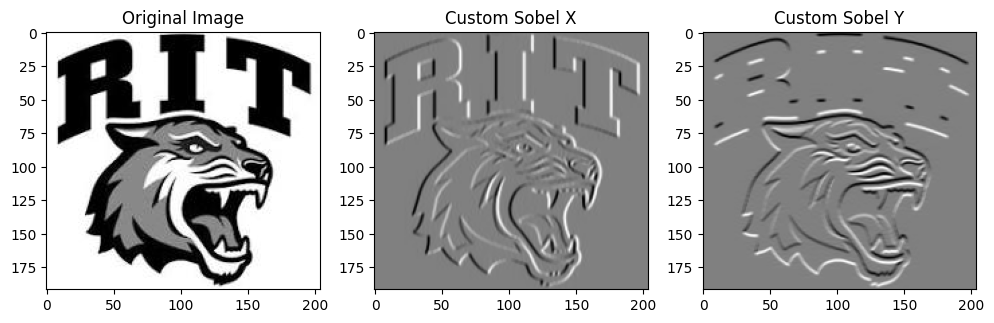

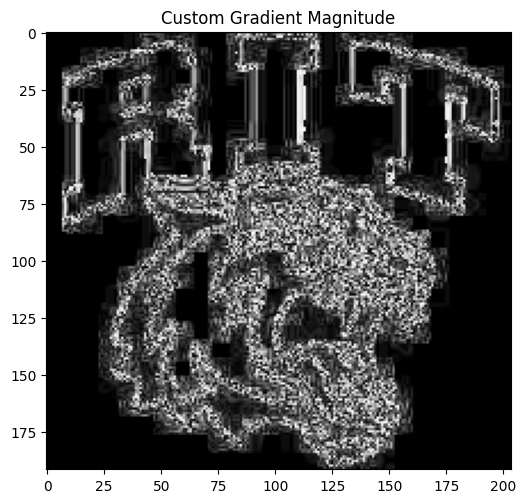

In [6]:
# Load the image
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# Define a custom Sobel kernel (e.g., larger or different weights)
custom_kernel_x = np.array([
    [-4, 0, 4],
    [-5, 0, 5],
    [-4, 0, 4]
])

custom_kernel_y = np.array([
    [-5, -4, -3],
    [ 0,  0,  0],
    [ 5,  4,  3]
])

# Apply the custom Sobel operator
# Here we use the generalized filter2D, as with the custom high-pass and low-pass kernels
sobel_custom_x = cv2.filter2D(image, cv2.CV_64F, custom_kernel_x)
sobel_custom_y = cv2.filter2D(image, cv2.CV_64F, custom_kernel_y)

# Combine the two gradients
sobel_custom_magnitude = np.sqrt(sobel_custom_x**2 + sobel_custom_y**2)
sobel_custom_magnitude = np.uint8(sobel_custom_magnitude)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Custom Sobel X')
plt.imshow(sobel_custom_x, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Custom Sobel Y')
plt.imshow(sobel_custom_y, cmap='gray')

plt.figure(figsize=(6, 6))
plt.title('Custom Gradient Magnitude')
plt.imshow(sobel_custom_magnitude, cmap='gray')

plt.show()

What happened?
By raising the kernel parameters, we greatly increased the magnitude of the gradient; that is, much bigger jumps in intensity.
Big jumps in intensity = crappy edge detection.
Let's try lowering the kernel parameters.

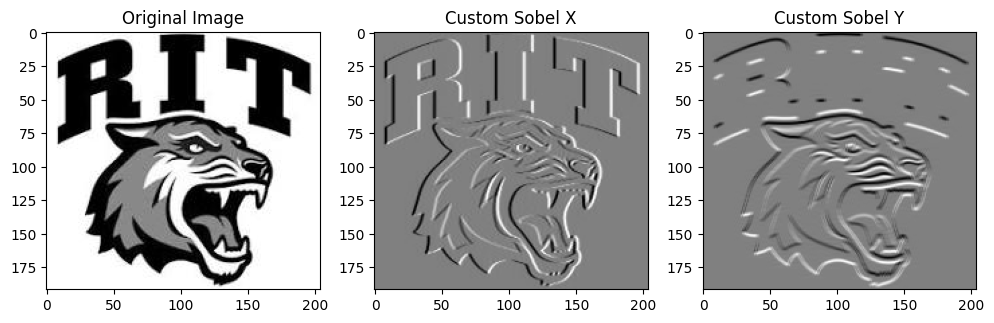

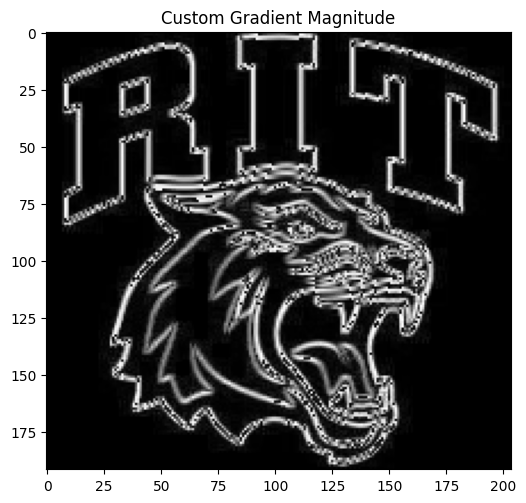

In [7]:
# Load the image
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# Define a custom Sobel kernel (e.g., larger or different weights)
custom_kernel_x = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]
])

custom_kernel_y = np.array([
    [-1, 0, -1],
    [ 0,  0,  0],
    [ 1,  0,  1]
])

# Apply the custom Sobel operator
# Here we use the generalized filter2D, as with the custom high-pass and low-pass kernels
sobel_custom_x = cv2.filter2D(image, cv2.CV_64F, custom_kernel_x)
sobel_custom_y = cv2.filter2D(image, cv2.CV_64F, custom_kernel_y)

# Combine the two gradients
sobel_custom_magnitude = np.sqrt(sobel_custom_x**2 + sobel_custom_y**2)
sobel_custom_magnitude = np.uint8(sobel_custom_magnitude)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Custom Sobel X')
plt.imshow(sobel_custom_x, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Custom Sobel Y')
plt.imshow(sobel_custom_y, cmap='gray')

plt.figure(figsize=(6, 6))
plt.title('Custom Gradient Magnitude')
plt.imshow(sobel_custom_magnitude, cmap='gray')

plt.show()

Let's apply the Canny edge detector again, now with our broader understanding of the algorithm.

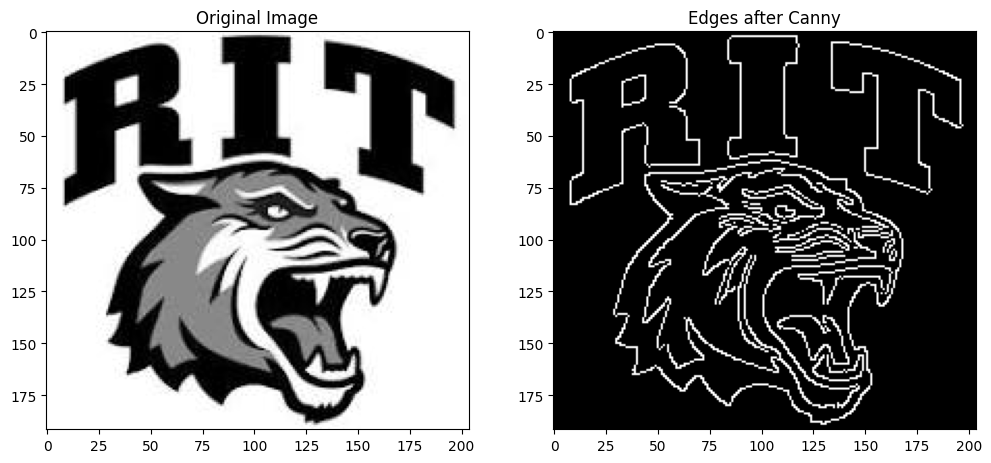

In [8]:
# Load the image in grayscale
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detector with hysteresis
# The parameters 100 and 200 represent the low and high thresholds
edges = cv2.Canny(image, 100, 200)

# Display the original image and the edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Edges after Canny')
plt.imshow(edges, cmap='gray')

plt.show()

Let's look at the thresholding.

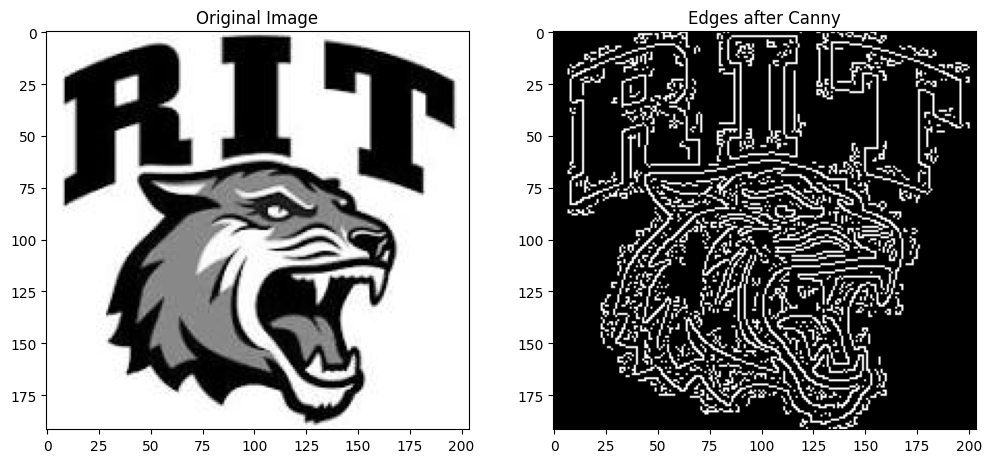

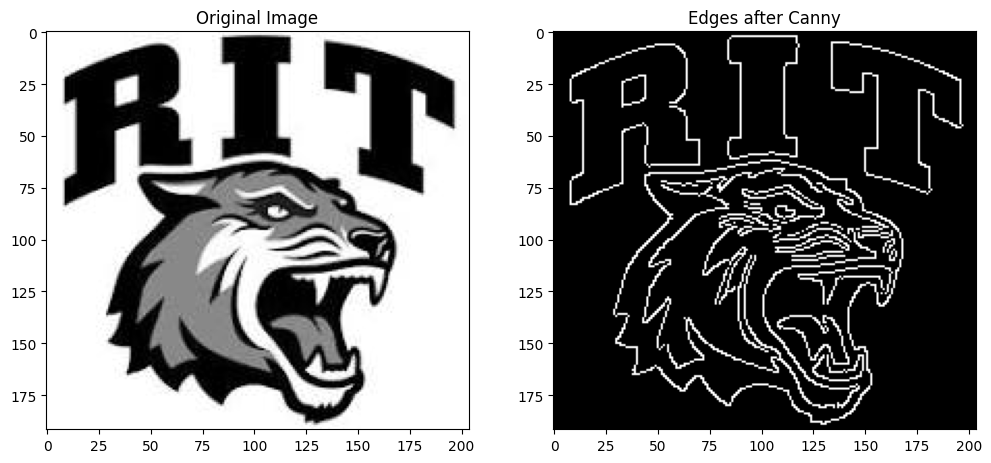

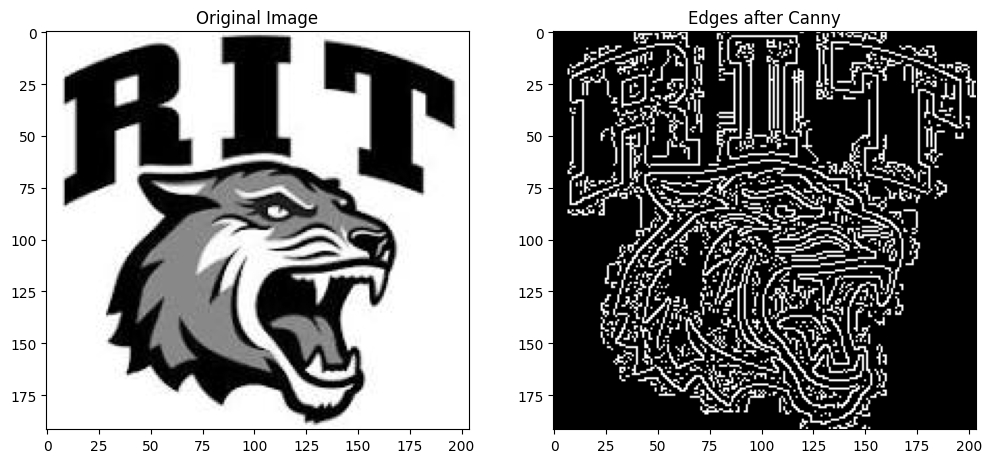

In [9]:
# Load the image in grayscale
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detector with hysteresis
# Low and high thresholds
edges = cv2.Canny(image, 10, 20)

# Display the original image and the edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Edges after Canny')
plt.imshow(edges, cmap='gray')

plt.show()

# Apply Canny edge detector with hysteresis
# Low and high thresholds
edges = cv2.Canny(image, 180, 190)

# Display the original image and the edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Edges after Canny')
plt.imshow(edges, cmap='gray')

plt.show()

# Apply Canny edge detector with hysteresis
# Low and high thresholds
edges = cv2.Canny(image, 0, 10)

# Display the original image and the edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Edges after Canny')
plt.imshow(edges, cmap='gray')

plt.show()

Since we know all the component parts of the Canny edge detector, we can write one by hand.

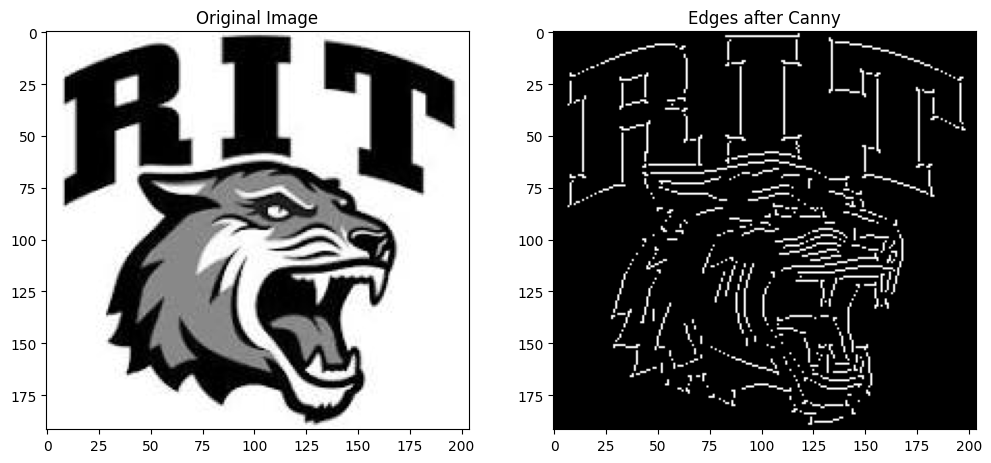

In [10]:
# Load the image
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian Blur to smooth the image
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Sobel operator with standard kernel
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])
gradient_x = cv2.filter2D(blurred_image, cv2.CV_64F, sobel_x)
gradient_y = cv2.filter2D(blurred_image, cv2.CV_64F, sobel_y)
magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
direction = np.arctan2(gradient_y, gradient_x)

# Step 3: Non-maximal suppression
rows, cols = magnitude.shape
suppressed_image = np.zeros((rows, cols), dtype=np.float32)
angle = direction * 180. / np.pi
angle[angle < 0] += 180

for i in range(1, rows-1):
    for j in range(1, cols-1):
        try:
            q = 255
            r = 255
              
            # Angle 0
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            # Angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            # Angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            # Angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]
                
            if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                suppressed_image[i,j] = magnitude[i,j]
            else:
                suppressed_image[i,j] = 0
            
        except IndexError as e:
            pass

# Step 4: Double Threshold
strong = 255
weak = 75
low_threshold = 100
high_threshold = 200

strong_i, strong_j = np.where(suppressed_image >= high_threshold)
weak_i, weak_j = np.where((suppressed_image <= high_threshold) & (suppressed_image >= low_threshold))
    
thresholded_image = np.zeros_like(suppressed_image)
thresholded_image[strong_i, strong_j] = strong
thresholded_image[weak_i, weak_j] = weak

#Step 5: Hysteresis
rows, cols = thresholded_image.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        if thresholded_image[i, j] == weak:
            if ((thresholded_image[i+1, j-1] == strong) or (thresholded_image[i+1, j] == strong) or (thresholded_image[i+1, j+1] == strong)
                or (thresholded_image[i, j-1] == strong) or (thresholded_image[i, j+1] == strong)
                or (thresholded_image[i-1, j-1] == strong) or (thresholded_image[i-1, j] == strong) or (thresholded_image[i-1, j+1] == strong)):
                    thresholded_image[i, j] = strong
            else:
                thresholded_image[i, j] = 0

# Display the original image and the edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Edges after Canny')
plt.imshow(thresholded_image, cmap='gray')

plt.show()

Our hand-written hyteresis function isn't as good as the built-in openCV option.
5 Bonus points: why?

Advanced Filters: LoG and Sharr operator

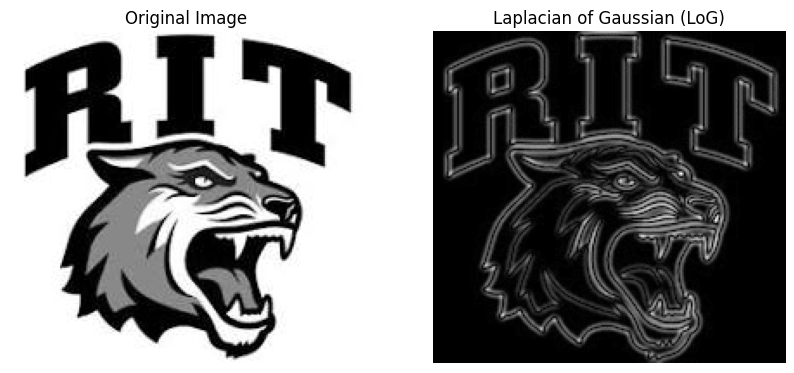

In [11]:
# Test the LoG filter:
# Load the image in grayscale
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian Blur to smooth the image
# Adjust the kernel size (must be positive and odd) and standard deviation as needed
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Apply the Laplacian operator
# The depth parameter (cv2.CV_64F) ensures we capture the full range of gradients
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert the Laplacian output to a format suitable for display (optional)
laplacian = cv2.convertScaleAbs(laplacian)

# Display the original and LoG images side by side using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Laplacian of Gaussian (LoG)')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.show()

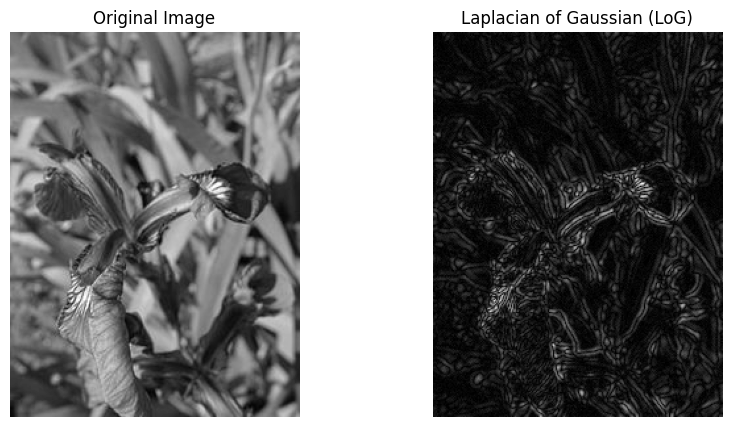

In [12]:
# But does it actually work better on noisy images?
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('iris_1.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian Blur to smooth the image
# Adjust the kernel size (must be positive and odd) and standard deviation as needed
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Apply the Laplacian operator
# The depth parameter (cv2.CV_64F) ensures we capture the full range of gradients
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert the Laplacian output to a format suitable for display (optional)
laplacian = cv2.convertScaleAbs(laplacian)

# Display the original and LoG images side by side using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Laplacian of Gaussian (LoG)')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.show()


Does the Scharr operator work better?

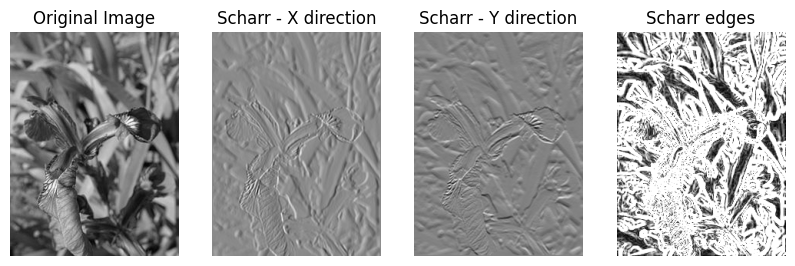

In [13]:
# Load the image in grayscale
image = cv2.imread('iris_1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the Scharr operator
# cv2.Scharr(src, ddepth, dx, dy)
# ddepth = cv2.CV_64F ensures the output has enough precision
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)  # Gradient in x direction
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)  # Gradient in y direction

# Calculate the gradient magnitude
magnitude = cv2.magnitude(scharr_x, scharr_y)

# Convert to 8-bit image for display
magnitude = cv2.convertScaleAbs(magnitude)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Scharr - X direction')
plt.imshow(scharr_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Scharr - Y direction')
plt.imshow(scharr_y, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Scharr edges')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.show()
